Software Defect Prediction Data

Goal : Predict software defect

Dataset: 

  - Number of instances: 10885

  - Number of attributes: 22 

  - Attribute Information:

     1. loc             : numeric % McCabe's line count of code
     2. v(g)            : numeric % McCabe "cyclomatic complexity"
     3. ev(g)           : numeric % McCabe "essential complexity"
     4. iv(g)           : numeric % McCabe "design complexity"
     5. n               : numeric % Halstead total operators + operands
     6. v               : numeric % Halstead "volume"
     7. l               : numeric % Halstead "program length"
     8. d               : numeric % Halstead "difficulty"
     9. i               : numeric % Halstead "intelligence"
     10. e               : numeric % Halstead "effort"
     11. b               : numeric % Halstead 
     12. t               : numeric % Halstead's time estimator
     13. lOCode          : numeric % Halstead's line count
     14. lOComment       : numeric % Halstead's count of lines of comments
     15. lOBlank         : numeric % Halstead's count of blank lines
     16. lOCodeAndComment: numeric
     17. uniq_Op         : numeric % unique operators
     18. uniq_Opnd       : numeric % unique operands
     19. total_Op        : numeric % total operators
     20. total_Opnd      : numeric % total operands
     21: branchCount     : numeric % of the flow graph
     22. defects         : {false,true} reported defects

  - Missing attributes: none

  - Class Distribution: the class value (defects) is discrete 
    
     False: 2106 = 19.35%
     
     True:  8779 = 80.65%

- Evaluation Metric: ROC - AUC


# Result

- Best Model parameters:<br>
    StackingClassifier(final estimator=<b>Logistic Regression</b>,{'final_estimator__C': 0.2, 'stack_method': 'auto'}) <br>
   and the following 5 estimators:<br>
    1. Logistic Regression {'C': 1, 'penalty': 'l2'}<br>
    2. Random Forest {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 500}<br>
    3. SVM {'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}<br>
    4. ExtraTrees {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}<br>
    5. XGBoost {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.8}<br><br>
    
- Mean Cross validation score of Best model:<br>
   0.856018
- Train score of bestmodel:<br>
   0.961326
- Test score of best model:<br>
   0.864968
     	

# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
data = pd.read_csv('data.csv')

data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [3]:
pd.pandas.set_option('display.max_columns', 999)
data.head(5)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11,16,76,50,7,True


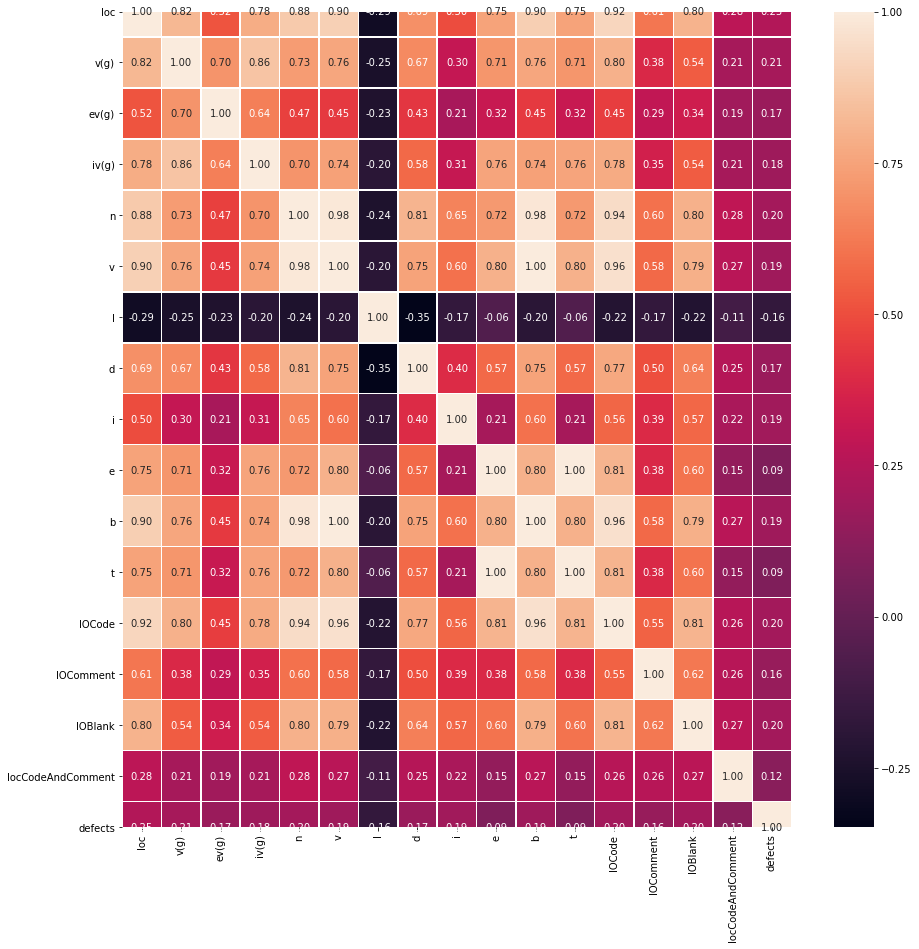

In [4]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)

The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
loc                  10885 non-null float64
v(g)                 10885 non-null float64
ev(g)                10885 non-null float64
iv(g)                10885 non-null float64
n                    10885 non-null float64
v                    10885 non-null float64
l                    10885 non-null float64
d                    10885 non-null float64
i                    10885 non-null float64
e                    10885 non-null float64
b                    10885 non-null float64
t                    10885 non-null float64
lOCode               10885 non-null int64
lOComment            10885 non-null int64
lOBlank              10885 non-null int64
locCodeAndComment    10885 non-null int64
uniq_Op              10885 non-null object
uniq_Opnd            10885 non-null object
total_Op             10885 non-null object
total_Opnd           10885 non-null object
branchCount          10

In [6]:
from collections import Counter
counter=Counter(data['defects'])
print(counter)

Counter({False: 8779, True: 2106})


In [7]:
data['defects'].unique()

array([False,  True])

In [8]:
data['defects']= data['defects'].astype(int)
data['uniq_Op']=pd.to_numeric(data['uniq_Op'],errors='coerce')
#data['uniq_Op']= data['uniq_Op'].astype(str)
#data['uniq_Op']= data['uniq_Op'].astype(float)
data['uniq_Opnd']=pd.to_numeric(data['uniq_Opnd'],errors='coerce')
data['total_Op']=pd.to_numeric(data['total_Op'],errors='coerce')
data['total_Opnd']=pd.to_numeric(data['total_Opnd'],errors='coerce')
data['branchCount']=pd.to_numeric(data['branchCount'],errors='coerce')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
loc                  10885 non-null float64
v(g)                 10885 non-null float64
ev(g)                10885 non-null float64
iv(g)                10885 non-null float64
n                    10885 non-null float64
v                    10885 non-null float64
l                    10885 non-null float64
d                    10885 non-null float64
i                    10885 non-null float64
e                    10885 non-null float64
b                    10885 non-null float64
t                    10885 non-null float64
lOCode               10885 non-null int64
lOComment            10885 non-null int64
lOBlank              10885 non-null int64
locCodeAndComment    10885 non-null int64
uniq_Op              10880 non-null float64
uniq_Opnd            10880 non-null float64
total_Op             10880 non-null float64
total_Opnd           10880 non-null float64
branchCount        

In [10]:
data['defects'].unique()

array([0, 1], dtype=int64)


if data['defects'] =='True':
    data['defects'] = 1
else:
    data['defects'] = 0

In [11]:
data['defects'].value_counts()

0    8779
1    2106
Name: defects, dtype: int64

## Quantifying Missing Data¶

In [12]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

loc [  1.1   1.   72.  190.   37.   31.   78.    8.   24.  143.   73.   83.
  12.   48.   68.  138.   10.  250.   77.   85. ] 

v(g) [ 1.4  1.   7.   3.   4.   2.   9.  22.  10.  11.   8.  49.  17.   6.
 35.  43.   5.  16.  21.  26. ] 

ev(g) [ 1.4  1.   5.  20.   4.  10.  34.  13.   6.  26.  33.   9.  21.  17.
  3.  15.  12.  95.  14.  18. ] 

iv(g) [ 1.4  1.   6.   3.   4.   2.  10.   7.   5.   8.  16.  24.  19.  11.
 85.   9.  55.  26.  35.  15. ] 

n [1.300e+00 1.000e+00 1.980e+02 6.000e+02 1.260e+02 1.110e+02 0.000e+00
 1.600e+01 3.700e+01 1.290e+02 9.000e+00 1.469e+03 2.840e+02 2.770e+02
 3.220e+02 1.710e+02 5.260e+02 1.450e+02 8.140e+02 8.800e+01] 

v [1.30000e+00 1.00000e+00 1.13413e+03 4.34876e+03 5.99120e+02 5.82520e+02
 0.00000e+00 5.07200e+01 1.67370e+02 6.95610e+02 2.70000e+01 9.67331e+03
 1.16084e+03 1.71458e+03 2.06926e+03 9.27890e+02 3.29633e+03 6.73360e+02
 5.81159e+03 4.65120e+02] 

l [1.3  1.   0.05 0.06 0.08 0.   0.36 0.15 0.5  0.01 0.02 0.03 0.04 0.19
 0.11 0.17 0.

In [13]:
# make list of variables  types

# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']



discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 30 
]
#data.unique gives me unique values

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete 
]

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')

print(f'There are {len(categorical)} categorical variables')

There are 21 continuous variables
There are 1 discrete variables
There are 0 categorical variables


In [14]:

for var in discrete:
    print(var, data[var].unique(), '\n')

defects [0 1] 



In [15]:

for var in categorical:
    print(var, data[var].unique(), '\n')

In [16]:
for var in continuous:
    print(var, data[var].unique()[0:20], '\n')

loc [  1.1   1.   72.  190.   37.   31.   78.    8.   24.  143.   73.   83.
  12.   48.   68.  138.   10.  250.   77.   85. ] 

v(g) [ 1.4  1.   7.   3.   4.   2.   9.  22.  10.  11.   8.  49.  17.   6.
 35.  43.   5.  16.  21.  26. ] 

ev(g) [ 1.4  1.   5.  20.   4.  10.  34.  13.   6.  26.  33.   9.  21.  17.
  3.  15.  12.  95.  14.  18. ] 

iv(g) [ 1.4  1.   6.   3.   4.   2.  10.   7.   5.   8.  16.  24.  19.  11.
 85.   9.  55.  26.  35.  15. ] 

n [1.300e+00 1.000e+00 1.980e+02 6.000e+02 1.260e+02 1.110e+02 0.000e+00
 1.600e+01 3.700e+01 1.290e+02 9.000e+00 1.469e+03 2.840e+02 2.770e+02
 3.220e+02 1.710e+02 5.260e+02 1.450e+02 8.140e+02 8.800e+01] 

v [1.30000e+00 1.00000e+00 1.13413e+03 4.34876e+03 5.99120e+02 5.82520e+02
 0.00000e+00 5.07200e+01 1.67370e+02 6.95610e+02 2.70000e+01 9.67331e+03
 1.16084e+03 1.71458e+03 2.06926e+03 9.27890e+02 3.29633e+03 6.73360e+02
 5.81159e+03 4.65120e+02] 

l [1.3  1.   0.05 0.06 0.08 0.   0.36 0.15 0.5  0.01 0.02 0.03 0.04 0.19
 0.11 0.17 0.

In [17]:
data[continuous].describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


In [18]:
# missing values
for i in data.columns:
    if data[i].isnull().mean()>0:
        print(i,': ', data[i].isnull().mean())

uniq_Op :  0.00045934772622875517
uniq_Opnd :  0.00045934772622875517
total_Op :  0.00045934772622875517
total_Opnd :  0.00045934772622875517
branchCount :  0.00045934772622875517


## Feature Engineering 

In [19]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('defects', axis=1),  # predictors
    data['defects'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((8708, 21), (8708,), (2177, 21), (2177,))

In [20]:
null_col = []
for col in X_train.columns:
    null_count = sum((X_train[col].isnull()))
    if null_count > 0:
        null_col.append(col)
null_col

['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [21]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import DecisionTreeDiscretiser

In [22]:
data_pipe = Pipeline([

    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
       variables=null_col)),
    #('imputer_num_arbit',
     #mdi.ArbitraryNumberImputer(arbitrary_number=-1,
     #                           variables = col_impu),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=null_col)),
    
     # categorical encoding 
     #('rare_label_enc', ce.RareLabelCategoricalEncoder(
     #    tol=0.01,n_categories=6, variables=categorical)),
    #('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
     
    # discretisation and encoding
   ('treeDisc',  DecisionTreeDiscretiser(cv=2,
                               regression=True,
                                  param_grid={'max_depth': [1,2,3,4,5,6]})),
    
    
    # feature Scaling
     #('scale',MinMaxScaler())
    ('scaler', StandardScaler()),
   

])

In [23]:
data_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['uniq_Op', 'uniq_Opnd',
                                                'total_Op', 'total_Opnd',
                                                'branchCount'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['uniq_Op', 'uniq_Opnd',
                                              'total_Op', 'total_Opnd',
                                              'branchCount'])),
                ('treeDisc',
                 DecisionTreeDiscretiser(cv=2,
                                         param_grid={'max_depth': [1, 2, 3, 4,
                                                                   5,...
                                         scoring='neg_mean_squared_error',
                                         variables=['loc', 'v(g)', 'ev(g)',
                                                   

In [24]:
# Apply Transformations
X_train=data_pipe.transform(X_train)
X_test=data_pipe.transform(X_test)

# Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Naive Algorithm 

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores_naive = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')
param_grid={}
grid_naive = GridSearchCV(model_dummy, param_grid, cv=5, return_train_score=True)
grid_naive.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DummyClassifier(constant=None, random_state=123,
                                       strategy='stratified'),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [27]:
print('train score: ', grid_naive.score(X_train, y_train))
print('test score: ', grid_naive.score(X_test, y_test))
#print(f'Validation score is {grid_search.score(X_val,y_val)}')
print("Best parameters: {}".format(grid_naive.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_naive.best_score_))

train score:  0.6912034910427194
test score:  0.6839687643546164
Best parameters: {}
Best cross-validation score: 0.6851


## Logistic Regression

In [28]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10,scoring='roc_auc')



In [29]:
# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))



Mean Cross-validation scores: 0.7199978225051314

Logistic.coef_: [[ 0.46276333 -0.00501577  0.01886077  0.11080961  0.22128062  0.59711275
  -0.25958811  0.21770702  0.35656298 -0.00277385 -0.75478205 -0.03406936
   0.01434774 -0.01513656  0.14353585  0.07778648  0.16965617 -0.04715006
  -0.06322817 -0.30178104  0.07462318  0.03506917  0.03506917  0.03506917
   0.03506917  0.03506917]]
Logistic.intercept_: [-1.60226594]
Logistic Performance:  0.8194763435920992


## Penalized logistic regression 

In [30]:
from sklearn.model_selection import GridSearchCV
param_lr = {'C': [1,2,3,10,100],'penalty':['l1', 'l2']}

grid_PLR = GridSearchCV(LogisticRegression(), param_lr, cv=10,
                          return_train_score=True, scoring = 'roc_auc')
grid_PLR.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [31]:
print('train score: ', grid_PLR.score(X_train, y_train))
print('test score: ', grid_PLR.score(X_test, y_test))
#print(f'Validation score is {grid_search.score(X_val,y_val)}')
print("Best parameters: {}".format(grid_PLR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_PLR.best_score_))

train score:  0.7242866956452128
test score:  0.7277115545472094
Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.7200


## KNN

In [32]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,5)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [33]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

#print(f'Validation score is {grid_knn.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.66

KNN parameters:  {'n_neighbors': 4}
KNN Test Performance:  0.6690128433591357


## Decision Tree model

In [34]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True, scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True

In [35]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_train,y_train))

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.7108

Decision Tree parameters:  {'max_depth': 4}
Decision Tree Performance:  0.7242433577559524
Decision Tree Performance:  0.7295026590313348


# Ensemble Models

## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [700,800,900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,10,12,14,16,18],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=10, return_train_score=True,scoring = 'roc_auc' )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [38]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.7375286858793372
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 900}
Train score is 0.9099153653773854
Test score is 0.7576686687498776


## Extra-Trees

In [39]:
from  sklearn.ensemble import ExtraTreesClassifier

In [40]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [41]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
#print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7234589841135926
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.7598810177949397
Test score is 0.7413326209013011


## Gradient Boost¶

In [42]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [43]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
#print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7235263261646694
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.7731616499078127
Test score is 0.7321393103023827


## XGBoost

In [44]:
from xgboost import XGBClassifier

In [45]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [4,6,8],
              'n_estimators' : [40,50,100],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [46]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
#print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7335759709574361
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.7}
Train score is 0.7894659590100688
Test score is 0.739840849771024


# Cost Sensitive Algorithms

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## logistic regession

In [49]:
#cost sensitive logistic regession
param_grid = {
'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.72


## Decision Tree

In [50]:
#decison tree
param_grid = {
'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_dtree.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.60


## XGB

In [51]:
#xgb
param_grid = {
'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.71


## Random Forest

In [52]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % scores.mean())



Mean ROC AUC: 0.686


## Extra Trees

In [53]:
#extratrees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.673


## Bagging Decision Tree

In [54]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Using TensorFlow backend.


Mean ROC AUC: 0.698


# Data Sampling Algorithms

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Decision tree

In [56]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.70


## Logistic regression

In [57]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.7208


## Knn

In [58]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.68


## SVM

In [59]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.66


## Randomforest

In [60]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5], 
                'rf__max_depth' : [4,5]}
ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.72


## xgb

In [61]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                early_stopping_rounds=2,
                                                                n_estimators=100,
                                                                objective ='binary:logistic',
                                                                max_depth = 4,
                                                               ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
'xgb__learning_rate' : [0.1,0.5]}
ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))


Best parameters: {'smote__k_neighbors': 4, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.72


## Easy Ensemble Classifier

In [62]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.71
